<a href="https://colab.research.google.com/github/sling1678/ML_programs_for_video_lectures/blob/main/ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge Regression for Reducing Effective Dimension of Predictors

$\textbf{Theory:}$

Linear regression optimizes the following loss function.

$L(w_0, \vec{w}) = \sum_{i=1}^{N} \left( y_i - w_0 -\sum_{j=1}^{p} x_{ij} w_{j} \right)^2 . (1)$

In ridge regression, we restrict the sum of square of weights of coefficients of $x$ to be less than a threshold, say $t$.  Thus, we find minimum of (1) subject to (2).

$ \sum_{j=1}^{p} w_i^2 \le t. (2) $

In terms of Lagrange multipliers we have the following loss function to minimize.

$L_{ridge}(w_0, \vec{w}, \lambda) = \sum_{i=1}^{N} \left( y_i - w_0 -\sum_{j=1}^{p} x_{ij} w_{j} \right)^2  + \lambda \left( \sum_{j=1}^{p} w_i^2 - t\right). (3)$

The optimal values of $\left(w_0, \vec w, \lambda\right)$ are obtained by solving

$ ∇_{w_0} L_{ridge} = 0,  \nabla_{\vec w} L_{ridge} = 0,  \nabla_\lambda L_{ridge} = 0.  (4)$

$\textbf{Preprocessing - Estimate of $w_0$ and Centering the Input}$

First notice that $ ∇_{w_0} L_{ridge} = 0$ gives $ \sum_{i=1}^{N} (y_i - w_0) = 0$, which immediately gives
$$ w_0 = \frac{1}{N} \sum_{i}y_i. $$
That is $w_0$ is just mean of $y_i$ values for all examples in the data. Thus, we can take care of this in the data by centering $y$. Let

$$y^{c} = y - w_0. (4) $$

Now we center $x_{ij}$ for each component $j=1,\cdots p$. Let mean of each property in $x$ be

$$\mu_{j} = \sum_{a=1}^{N} x_{a,j} \ \ \ \ (\dagger)$$

Now, we subtract to center all predictors.

$$ x^{c}_{i,j} = x_{i,j} - \mu_{j}.  (5)$$



$\textbf{Matrix Notation}$
 
Let us write all $N$ cases of $x'$ in an $N \times (p)$ matrix $X$.

$$ x^{c}_{11}\ x^{c}_{12}\ \cdots \ x^{c}_{1p} $$
$$ x^{c}_{21}\ x^{c}_{22}\ \cdots \ x^{c}_{2p} $$
$$\cdots \ \ \ \ \ \ \ (*)$$
$$ x^{c}_{21}\ x^{c}_{N2}\ \cdots \ x^{c}_{Np} $$

Let us write $p$-dimensional vector of coefficients as $W$  and $N$ cases of $y^{c}_i$ as an $N$-dimensional vector $Y$. Then, we can write (3) in a matrix form 

$L_{ridge}(W, \lambda) =  (Y-XW)^T(Y-XW) + \lambda \left(W^TW - t\right). (3)$

Then, just $\nabla_{W} L_{ridge} = 0$ gives

$ Y^T X - W^T X^T X + \lambda W^T = 0. $

Therefore
$ W^T \left(X^TX - \lambda \right) = Y^T X $. Taking transpose, we get

$$  \left(X^TX - \lambda \right) W = X^T Y $$

Since $X^TX$ is a $(p+1)\times(p+1)$-dimensional vector, we multiply scalar $\lambda$ by an identity matrix $I$ of this same dimension when subtracting. 

$ \left(X^TX - \lambda I \right) W = X^T Y.$

Inverting this

$$ W = \left(X^TX - \lambda I \right)^{-1}X^T Y. (6)$$

Recall that $w_0$ is

$$w_0 = \frac{1}{N}\sum_{i=1}^{N} y_i, (7) $$

where $y_i$'s are the original $y$ values while $Y$ are centered $y$ values. Also, recall that $X$ in (6) are centered as given by (5). 

$\textbf{Prediction:}$ The prediction on a new example $x=(x_1, x_2, ... x_p)$ will be done by

$\textbf{Step 1.}$ First center this $x$ by $x^{c}_j = x_j - \mu_j$, where $\mu_j$ was computed in Eq. $(\dagger)$ using the training data.

$\textbf{Step 2.}$ Then, we predict 
$$ y_{pred} = w_0 + W^T x^c.$$


## Save Time by Using RidgeRegression() in sklearn

class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

(1) alpha here is our $\lambda$ Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf).

(2) solver is the most important parameter after auto to specify. This decides how to solve the minimization problem. 

solver:{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
Solver to use in the computational routines:

‘auto’ chooses the solver automatically based on the type of data.

‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than ‘cholesky’ at the cost of being slower.

$\textbf{SVD}:$

When you do SVD of the centered $X$ matrix, given in Eq. (*) you would get $X = U D V^T$, where $U$ is $N\times p$ matrix, $D$ is $p\times p$ and $V$ is also $p\times p$. Columns of $U$ span the column space of $X$ and are orthonormal. Columns of $V$ span the row space of $X$ and are also orthonormal. The diagonal entries are positive semidefinite and ordered $d_1 \ge d_2 \ge \cdots \ge d_p\ge 0$. They are the singular values of $X$. SVD is also important in Principal Component Analysis for dimensional reduction.


‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.

‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).

‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.

‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

‘lbfgs’ uses L-BFGS-B algorithm implemented in scipy.optimize.minimize. It can be used only when positive is True.


$\textbf{Other Penalty Term Functions: Lasso}$

Instead ofg Eq (2), if the penlaty term is on the sum of abosolute values of the coefficients, the result tends to do better in the situations with outliers in the data. 

$$ \sum_{i=1}^{p} |w_i| \le t. \ \ \ \  (2')$$

This is also available in 

lass sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')


## Ridge Regression on Prostate Cancer Data

We will use the prostate cancer data referred to in the Elements of Statistical Learning (ESL). The data has eight-dimensional predictor

x_1 = log of cancer volume (lcavol); NUMERICAL

x_2 = log of prostate weight (lweight); NUMERICAL

x_3 = age (age); NUMERICAL

x_4 = log of amount of benign prostatic hyperplasia (lbph); NUMERICAL

x_5 = seminal vesicle invasion (svi); INTEGER_CATEGORICAL

x_6 = log of capsular penetration (lcp); NUMERICAL

x_7 = Gleason score (gleason); INTEGER_CATEGORICAL

x_8 = percent of Gleason scores 4 or 5 (pgg45). NUMERICAL

In [1]:
#IMPORTS
import sys # for sys.stdout.write()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from tqdm import tqdm

from sklearn import linear_model # This will save time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer # to convert metrics into scoring function

from sklearn.model_selection import train_test_split # this in case we work with full data and need to set aside test data
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
# Globals these should be converted in commandline arguments
NUM_FOLDS = 5 # These will be used to do Cross validation to obtain best value of lambda
NUM_CV_TRIALS = 20 # for std error in averages of each cv splits
LAMBDAS = [1000, 500, 250, 125, 64, 32, 16, 8, 4, 1] # Ridge Parameter values to try

#Get Data

In [3]:
# Dataframe for this project
DATA_URL = "https://hastie.su.domains/ElemStatLearn/datasets/prostate.data"
df = pd.read_csv(DATA_URL, sep='\t') 

TARGET = ['lpsa']
ALL_FEATURES = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
TRAINING_SET_SELECTION = ['train']
df = df[ALL_FEATURES + TARGET + TRAINING_SET_SELECTION] # drops fictitious columns
if False:
  print(df.head(3))# check

In [4]:
# Remove extra columns in the data 
def clean_df(df, dropcols=None):
  if dropcols is not None:
    for col in dropcols:
      if col in df.columns:
        df.drop(col, axis=1, inplace=True)
  return df  

def prepare_train_and_test_sets(df):
  # special for this dataset; datapoints to be used in training
  # are labeled in a separate calumn with letter 'T'
  train_col_name, train_value="train","T"
  train = df[df[train_col_name]==train_value].copy()
  train.drop(columns=[train_col_name], axis=1, inplace=True)
  train.reset_index(drop=True, inplace=True)

  test = df[df[train_col_name]!=train_value].copy()
  test.drop(columns=[train_col_name], axis=1, inplace=True)
  test.reset_index(drop=True, inplace=True)
  return train, test
#-------------------------------------------------------
train, test = prepare_train_and_test_sets(df)

if False:
  print(f"full dataframe shape:{df.shape}")
  print(f"train dataframe shape:{train.shape}")
  print(f"test dataframe shape:{test.shape}")
  print(f"train dataframe first two rows:\n{train.head(2)}")

In [5]:
# Preprocessing- here only normalizing the train and test datasets based on train
def preprocess_params(train, features):
  means = train[features].mean()
  stds = train[features].std()
  return means, stds
def preprocess(train, test, features):
  means, stds = preprocess_params(train, features)
  train[features] = (train[features]-means)/stds
  test[features] = (test[features]-means)/stds
  return train, test
#-------------------------------------------------------
train, test = preprocess(train, test, features=ALL_FEATURES)
if False:
  print(train.describe()) # check that mean and std are properly normalized

In [6]:
from IPython.core.pylabtools import figsize
def print_list(L, name="", num_digits_for_rounding=2):
  print(name+":")
  sys.stdout.write("[\n")
  for i,value in enumerate(L):
    sys.stdout.write(str(np.round(value, num_digits_for_rounding))+", ")
    if (i+1)%10 == 0:
      sys.stdout.write("\n")
  sys.stdout.write("]\n") 

def fit_and_evaluate_linear_model_cv(train, target, features=None, alpha=1,
  num_folds=10, num_cv_trials=1, verbose=0):
  """
  alpha is the Lasso lambda. It must be positive real number.
  """
  results = dict() # collection of outputs
  train = train.copy()
  y = train[target]
  X = train.drop(target, axis=1)
  if features is not None: # if features is given, then restrict X to them.
    X = X[features]  
  features = X.columns
  RSS_cv_trials=[]
  for i in range(num_cv_trials):
    cv = KFold(n_splits=num_folds, random_state=None, shuffle=True) # each time get new split
    RSS_list=[]
    for train_index, val_index in cv.split(X):

      model = linear_model.Ridge(alpha, solver="svd", fit_intercept = True)
      X_train, y_train = X.iloc[train_index,:],  y.iloc[train_index,:]
      X_val, y_val = X.iloc[val_index, :], y.iloc[val_index, :]
      model.fit(X_train, y_train)
      RSS = mean_squared_error(y_val, model.predict(X_val)) * len(X_val)
      RSS_list.append(RSS)
    RSS_average_this_cv = np.mean(np.array(RSS_list))
    RSS_cv_trials.append(RSS_average_this_cv)

  RSS_average = np.mean(np.array(RSS_cv_trials))
  RSS_stderr = np.std(np.array(RSS_cv_trials))/np.sqrt(NUM_CV_TRIALS)

  results["RSS"] = (RSS_average, RSS_stderr)
  results["model"] = (model, features, target)
  if verbose !=0:
    #print_list(RSS_cv_trials, "RSS in different cv trials", 3)
    print(f"RSS = {RSS_average:0.3f} " + u"\u00B1" + f" {RSS_stderr:0.3f}")
    print(f"Features are: {features}")
    print(f"Intercept = {model.intercept_[0]:0.3f}")
    print_list(model.coef_[0], "Coefficients of X", 3)

  return results

if False:
  
  alphas = [8, 4, 1]
  for a in tqdm(alphas):
    results = fit_and_evaluate_linear_model_cv(train, target=TARGET, features=None, 
      alpha = a, num_folds=NUM_FOLDS, num_cv_trials=NUM_CV_TRIALS, verbose=1) #OK
  

In [7]:
def run_experiment(train, target, features=None,  alphas=[1,], 
                   num_folds=5, num_cv_trials=20, verbose=0):
  data = collections.defaultdict(list)
  for alpha in tqdm(alphas):
    results = fit_and_evaluate_linear_model_cv(train, target, features, 
      alpha, num_folds, num_cv_trials, verbose) #OK
    model, features, _ = results["model"]
    for i, feature in enumerate(features):
      data[feature].append(model.coef_[0][i])
  return data 

if False:
  alphas = [2, 1]
  data = run_experiment(train, target=TARGET, features=None, alphas=alphas, 
                    num_folds=NUM_FOLDS, num_cv_trials=NUM_CV_TRIALS, verbose=1)


100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


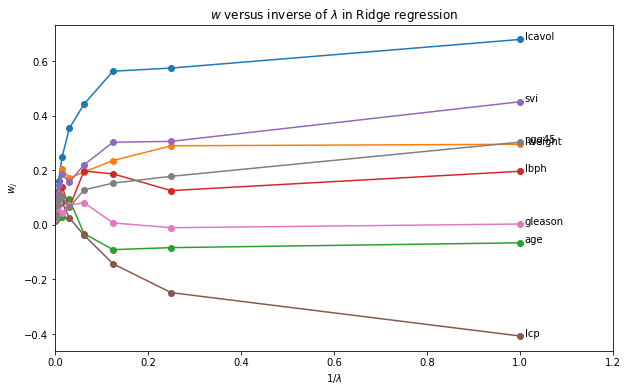

In [8]:
def plot_ridge_coeffs(alphas, data):
  x = [1/a if a!=0 else 1.0 for a in alphas ]
  fig, ax = plt.subplots(1,1, figsize=(10,6))
  ax.set_xlim(left=0, right=1.2)
  for feature,y in data.items():
    ax.plot(x,y, "o-", label=feature)
    ax.text(x[-1] + 0.01, y[-1], feature )
  ax.set_xlabel("1/$\lambda$")
  ax.set_ylabel("$w_{j}$")
  ax.set_title("$w$ versus inverse of $\lambda$ in Ridge regression")
  #plt.legend()
  plt.show()

if False:
  alphas = [2, 1]
  data = run_experiment(train, target=TARGET, features=None, alphas=alphas, 
    num_folds=NUM_FOLDS, num_cv_trials=NUM_CV_TRIALS, verbose=0)
  plot_ridge_coeffs(alphas, data)
else:
  alphas = LAMBDAS

  data = run_experiment(train, target=TARGET, features=None, alphas=alphas, 
    num_folds=NUM_FOLDS, num_cv_trials=NUM_CV_TRIALS, verbose=0)

  plot_ridge_coeffs(alphas, data)

# Lasso
## Looks like I should generalize the code a little bit by adding the choice of method to be used for the model. This can be easily done by passing a method indicator variable in  fit_and_evaluate_linear_model_cv() function.  
 

In [9]:
def fit_and_evaluate_linear_model_cv(train, target, features=None, method='ridge', alpha=1,
  num_folds=5, num_cv_trials=1, verbose=0):
  """
  alpha is the Lasso lambda. It must be positive real number.
  """
  results = dict() # collection of outputs
  train = train.copy()
  y = train[target]
  X = train.drop(target, axis=1)
  if features is not None: # if features is given, then restrict X to them.
    X = X[features]  
  features = X.columns
  RSS_cv_trials=[]
  for i in range(num_cv_trials):
    cv = KFold(n_splits=num_folds, random_state=None, shuffle=True) # each time get new split
    RSS_list=[]
    for train_index, val_index in cv.split(X):
      if method == 'ridge':
        model = linear_model.Ridge(alpha, fit_intercept = True)
      if method == 'lasso':
        model = linear_model.Lasso(alpha, fit_intercept = True)
      X_train, y_train = X.iloc[train_index,:],  y.iloc[train_index,:]
      X_val, y_val = X.iloc[val_index, :], y.iloc[val_index, :]
      model.fit(X_train, y_train)
      RSS = mean_squared_error(y_val, model.predict(X_val)) * len(X_val)
      RSS_list.append(RSS)
    RSS_average_this_cv = np.mean(np.array(RSS_list))
    RSS_cv_trials.append(RSS_average_this_cv)

  RSS_average = np.mean(np.array(RSS_cv_trials))
  RSS_stderr = np.std(np.array(RSS_cv_trials))/np.sqrt(NUM_CV_TRIALS)

  results["RSS"] = (RSS_average, RSS_stderr)
  results["model"] = (model, features, target)
  if verbose !=0:
    #print_list(RSS_cv_trials, "RSS in different cv trials", 3)
    print(f"RSS = {RSS_average:0.3f} " + u"\u00B1" + f" {RSS_stderr:0.3f}")
    print(f"Features are: {features}")
    print(f"Intercept = {model.intercept_[0]:0.3f}")
    if method=='lasso':
      print_list(model.coef_, "Coefficients of X", 3)
    else:
      print_list(model.coef_[0], "Coefficients of X", 3)
    #print("model_coef = \n",model.coef_)

  return results

if False:
  
  #alphas = [1.0, 1.0e-1, 1.0e-2, 1.0e-3, 1.0e-4, 1.0e-5, 1.0e-6]
  alphas = [1.0, 1.0e-1,]
  method = 'ridge'
  for a in tqdm(alphas):
    results = fit_and_evaluate_linear_model_cv(train, target=TARGET, method=method, features=None, 
      alpha = a, num_folds=NUM_FOLDS, num_cv_trials=NUM_CV_TRIALS, verbose=1) #OK

In [10]:
def run_experiment(train, target, features=None, method='ridge', alphas=[1,], 
                   num_folds=5, num_cv_trials=20, verbose=0):
  data = collections.defaultdict(list)
  for alpha in tqdm(alphas):
    results = fit_and_evaluate_linear_model_cv(train, target, features, method,
      alpha, num_folds, num_cv_trials, verbose) #OK
    model, features, _ = results["model"]
    for i, feature in enumerate(features):
      if method == 'ridge':
        data[feature].append(model.coef_[0][i])
      elif method == 'lasso':
        data[feature].append(model.coef_[i])
  return data 

if False:
  alphas = [2, 1]
  method = 'lasso'
  data = run_experiment(train, target=TARGET, features=None, method=method, alphas=alphas, 
                    num_folds=NUM_FOLDS, num_cv_trials=NUM_CV_TRIALS, verbose=1)

100%|██████████| 10/10 [00:14<00:00,  1.43s/it]


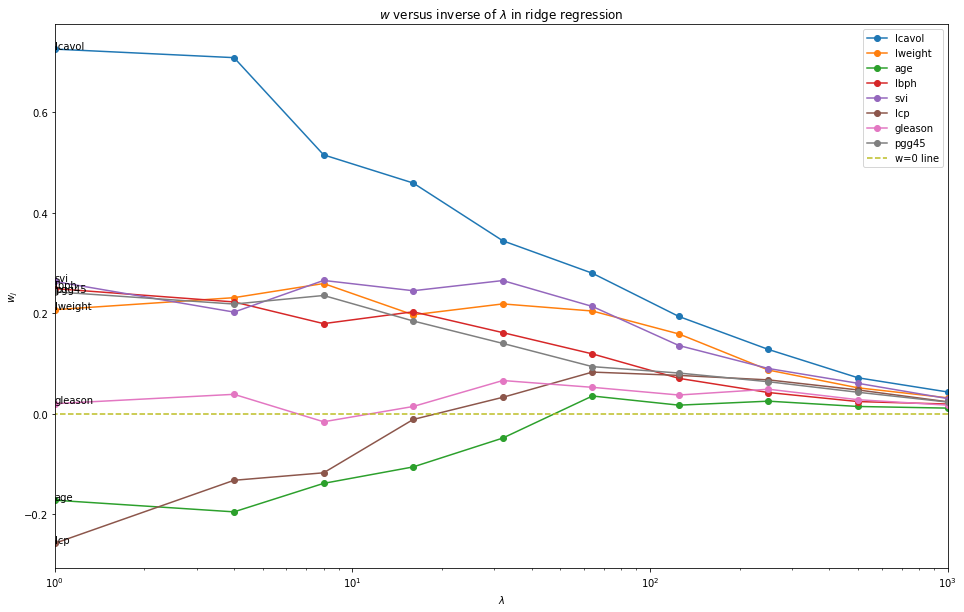

100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


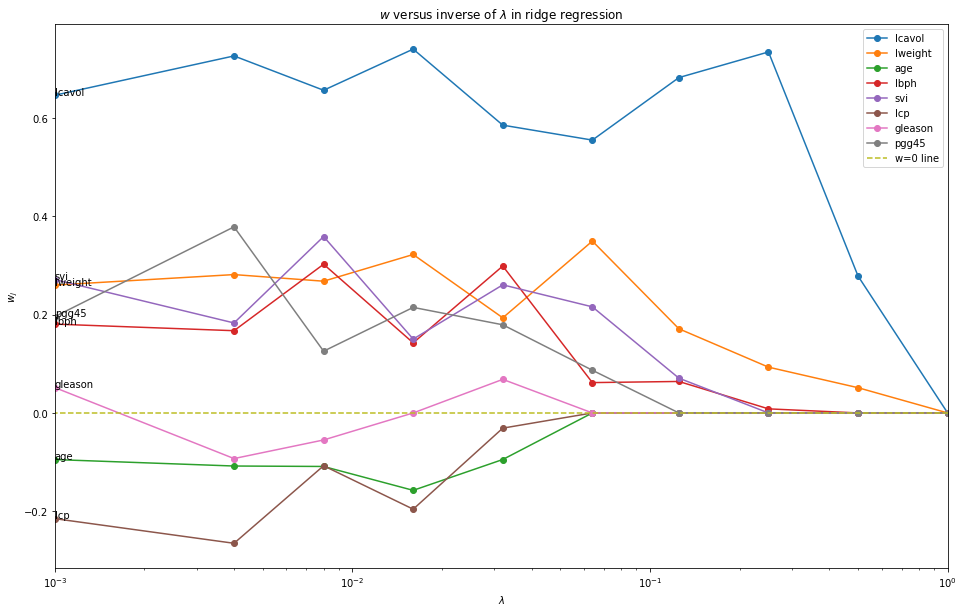

In [11]:
def plot_ridge_coeffs(alphas, data, method='ridge'):
  #x = [1/a if a!=0 else 1.0 for a in alphas ]
  x = np.array(alphas)
  fig, ax = plt.subplots(1,1, figsize=(16,10))
  ax.set_xlim(left=min(x), right=max(x)) 

  zero_y = np.zeros_like(x)
  for feature,y in data.items():
    ax.plot(x,y, "o-", label=feature)
    ax.text(x[-1], y[-1], feature )
  
  ax.plot(x, zero_y, "--", label="w=0 line")
  ax.set_xscale('log')
  ax.set_xlabel(r"$\lambda$")
  ax.set_ylabel(r"$w_{j}$")
  ax.set_title(r"$w$" +r" versus inverse of "+ r"$\lambda$" +r" in {0} regression".format(method))
  plt.legend()
  plt.show()

if False:
  alphas = [1000, 100, 10, 2, 1]
  method = 'ridge'
  if method == 'lasso':
    alphas = np.array(alphas) / max(alphas)

  data = run_experiment(train, target=TARGET, features=None, method=method, alphas=alphas, 
    num_folds=NUM_FOLDS, num_cv_trials=NUM_CV_TRIALS, verbose=1)
  plot_ridge_coeffs(alphas, data, method)
if True:
  alphas = LAMBDAS

  for method in ['ridge', 'lasso']:
    if method == 'lasso':
      alphas = np.array(alphas) / max(alphas)
    data = run_experiment(train, target=TARGET, features=None, method=method, alphas=alphas, 
      num_folds=NUM_FOLDS, num_cv_trials=NUM_CV_TRIALS, verbose=0)

    plot_ridge_coeffs(alphas, data)